# USE various models for churn prediction

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# development dataset

X_dev = pd.concat([X_train , X_val] , axis= 0 )
y_dev = pd.concat([y_train , y_val] , axis= 0 )

# 1.  Random forest Classifier.

In [ ]:
# Import and train decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)



# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)



# imort SVM from svc
from sklearn.svm import SVC

svc = SVC(random_state= 42 , probability=True)




# import and run Logistic regression
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=42)

In [ ]:
# Import gridSearchCv

from sklearn.model_selection import GridSearchCV


# Create parameter grid for random forest

rfc_param = {'n_estimators':[50,100,200] ,'max_depth':[None, 10, 20, 30] ,'min_samples_split': [2, 5, 10] , 'min_samples_leaf':[1, 2, 4] }

rfc_grid = GridSearchCV(estimator=rfc , param_grid= rfc_param , scoring = 'accuracy' , cv = 10 , return_train_score= True)

rfc_grid.fit(X_dev, y_dev )
rfc_y_pred = rfc_grid.predict(X_test)

rfc_best_params= rfc_grid.best_params_
rfc_best_score= rfc_grid.best_score_



In [ ]:
#best model

rfc_best_model = rfc_grid.best_estimator_

rfc_bestModel_y_pred = rfc_best_model.predict(X_test)
rfc_bestModel_y_score = accuracy_score(y_test ,rfc_bestModel_y_pred )

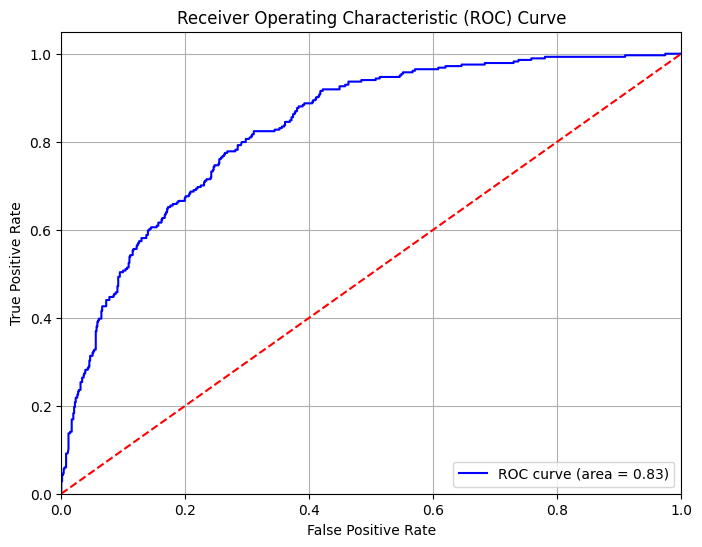

In [ ]:
# AUC ROC curve print

from sklearn.metrics import roc_curve, auc


# Get predicted probabilities
y_scores = rfc_best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


# Calculate AUC
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#  classification_report

from sklearn.metrics import classification_report


# Generate the classification report
report = classification_report(y_test, rfc_bestModel_y_pred)
print(report)

#------- RANDOM FOREST CLASSIFIER--------------------#

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       773
           1       0.64      0.51      0.57       284

    accuracy                           0.79      1057
   macro avg       0.74      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057



In [ ]:
rfc_bestModel_y_score

0.7909176915799432

In [ ]:
print('rfc_best_params :' , rfc_best_params , "rfc_best_score :",rfc_best_score)

rfc_best_params : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} rfc_best_score : 0.804037665898013


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test ,rfc_bestModel_y_pred)

cm

array([[691,  82],
       [139, 145]])

In [ ]:
X_dev.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'gender_male',
       'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_yes', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_yes', 'onlinebackup_yes',
       'deviceprotection_yes', 'techsupport_yes', 'streamingtv_yes',
       'streamingmovies_yes', 'contract_one_year', 'contract_two_year',
       'paperlessbilling_yes', 'paymentmethod_credit_card_(automatic)',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check'],
      dtype='object')

# 2. Logistic Regressino ( using hyperparameter tune )

In [ ]:
X_dev.rename(columns={'paymentmethod_credit_card_(automatic)': 'paymentmethod_credit_card'}, inplace=True)
X_test.rename(columns={'paymentmethod_credit_card_(automatic)': 'paymentmethod_credit_card'}, inplace=True)

In [ ]:
X_dev.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'gender_male',
       'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_yes', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_yes', 'onlinebackup_yes',
       'deviceprotection_yes', 'techsupport_yes', 'streamingtv_yes',
       'streamingmovies_yes', 'contract_one_year', 'contract_two_year',
       'paperlessbilling_yes', 'paymentmethod_credit_card',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [ ]:
# implement the gridSearchCv on Logistic regression

lrc_param = {'C': [0.01 , 0.1 , 0.5, 1, 2, 5, 10],
             'penalty': ['l2'],
             'solver' : ['liblinear' , 'lbfgs' , 'saga']

             }

lrc_grid = GridSearchCV(estimator=lrc , param_grid= lrc_param , scoring = 'accuracy' , cv = 10 , return_train_score= True)


# fit the data to gS on lrc

lrc_grid_fit = lrc_grid.fit(X_dev, y_dev )


lrc_best_params= lrc_grid.best_params_
lrc_best_score= lrc_grid.best_score_

lrc_bset_model = lrc_grid.best_estimator_


lrc_bestModel_y_pred = lrc_bset_model.predict(X_test)
lrc_bestModel_score = accuracy_score(y_test ,lrc_bestModel_y_pred )


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [ ]:
lrc_bestModel_score

0.8107852412488175

In [ ]:
print('lrc_best_params :' , lrc_best_params , 'lrc_best_score :' , lrc_bestModel_score)

lrc_best_params : {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'} lrc_best_score : 0.8107852412488175


In [ ]:
#  classification_report

from sklearn.metrics import classification_report


# Generate the classification report
report_lrc = classification_report(y_test, lrc_bestModel_y_pred)
print(report_lrc)

#---------------- LOGISTIC Regression-----------------#


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       773
           1       0.68      0.55      0.61       284

    accuracy                           0.81      1057
   macro avg       0.76      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057



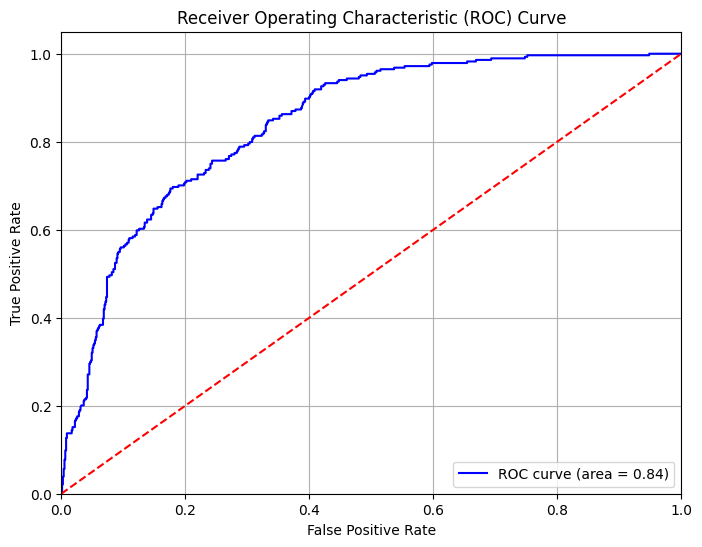

In [ ]:
# AUC ROC curve print

from sklearn.metrics import roc_curve, auc


# Get predicted probabilities
y_scores = lrc_bset_model.predict_proba(X_test)[:, 1]  # Probability of the positive class


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


# Calculate AUC
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
  #   seniorcitizen         :                    int64
  #   tenure                 :                   float64
  #   monthlycharges         :                   float64
  #   gender_male            :                   int64
  #   partner_yes            :                   int64
  #   dependents_yes         :                   int64
  #   phoneservice_yes       :                   int64
  #   multiplelines_yes       :                  int64
  #   internetservice_fiber_optic  :             int64
  #   internetservice_no     :                   int64
  #  onlinesecurity_yes      :                   int64
  #  onlinebackup_yes        :                   int64
  #  deviceprotection_yes    :                   int64
  #  techsupport_yes         :                   int64
  #  streamingtv_yes         :                   int64
  #  streamingmovies_yes     :                   int64
  #  contract_one_year       :                   int64
  #  contract_two_year       :                   int64
  #  paperlessbilling_yes    :                   int64
  #  paymentmethod_credit_card  :                int64
  #  paymentmethod_electronic_check         :    int64
  #  paymentmethod_mailed_check             :    int64


In [ ]:
X_dev.columns


Index(['seniorcitizen', 'tenure', 'monthlycharges', 'gender_male',
       'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_yes', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_yes', 'onlinebackup_yes',
       'deviceprotection_yes', 'techsupport_yes', 'streamingtv_yes',
       'streamingmovies_yes', 'contract_one_year', 'contract_two_year',
       'paperlessbilling_yes', 'paymentmethod_credit_card',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming you have your training data (X_train) and the scaler is already fit
scaler = StandardScaler()
scaler.fit(X_dev[['tenure', 'monthlycharges']])  # Replace with your actual column names


# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


# Save your existing model
joblib.dump(lrc_bset_model, 'lrc_bset_model.pkl')

['lrc_bset_model.pkl']

In [ ]:
X_dev.columns


Index(['seniorcitizen', 'tenure', 'monthlycharges', 'gender_male',
       'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_yes', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_yes', 'onlinebackup_yes',
       'deviceprotection_yes', 'techsupport_yes', 'streamingtv_yes',
       'streamingmovies_yes', 'contract_one_year', 'contract_two_year',
       'paperlessbilling_yes', 'paymentmethod_credit_card',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check'],
      dtype='object')

In [ ]:
import os

file_path = '/Users/mohd_rifat/Downloads/lrc_bset_model.pkl'  # Update with your actual path
if not os.path.exists(file_path):
    print("File not found!")
else:
    print("File found, proceeding to load.")

File not found!


# SVC

In [ ]:
# implement the gridSearchCv on   SVC

svc_param = {'C': [0.01 , 0.1 , 0.5, 1, 2, 5, 10],
             'kernel': ['rbf' , 'linear'],
             'gamma' : [.1 , .25 , .5 , 1 ,5]

             }

svc_grid = GridSearchCV(estimator=svc , param_grid= svc_param , scoring = 'accuracy' , cv = 10 , n_jobs=-1 , return_train_score= True)

# fit data to gridS svc

svc_grid_fit = svc_grid.fit(X_dev , y_dev)

svc_best_model = svc_grid.best_estimator_
svc_best_params= svc_grid.best_params_
svc_best_score_train= svc_grid.best_score_


svc_y_pred = svc_best_model.predict(X_test)
test_accuracy_test = accuracy_score(y_test ,svc_y_pred )


KeyboardInterrupt: 

In [ ]:
svc_best_params , svc_best_score_train , test_accuracy_test

In [ ]:
#  classification_report

from sklearn.metrics import classification_report


# Generate the classification report
report_svc = classification_report(y_test, svc_y_pred)
print(report_svc)
#--------------------SVC----------------------------#

In [ ]:
# AUC ROC curve print

from sklearn.metrics import roc_curve, auc


# Get predicted probabilities
y_scores = svc_best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


# Calculate AUC
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()